In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Data/Wimbledon_featured_matches.csv')

def divide_by_matches(df):
    return [df[df['match_id'] == i] for i in df['match_id'].unique()]

def divide_by_sets(match_df):
    return [match_df[match_df['set_no'] == i] for i in match_df['set'].unique()]

def divide_by_games(set_df):
    return [set_df[set_df['game_no'] == i] for i in set_df['game'].unique()]

def match_winner(match):
    last_row = match.iloc[-1]
    if last_row["p1_sets"] == last_row["p2_sets"]:
        return last_row["set_victor"]
    if last_row["p1_sets"] > last_row["p2_sets"]:
        return 1
    else:
        return 2

matches = divide_by_matches(df)

In [6]:
# Print unique values of 'match_id' column
matches = df['match_id'].unique()
len(matches)

31

In [17]:
# Divide df based on values on set_no column
match0_sets = [match0[match0['set_no'] == i] for i in match0['set_no'].unique()]

In [39]:
match0_sets[0]["set_victor"]

array([0, 1])

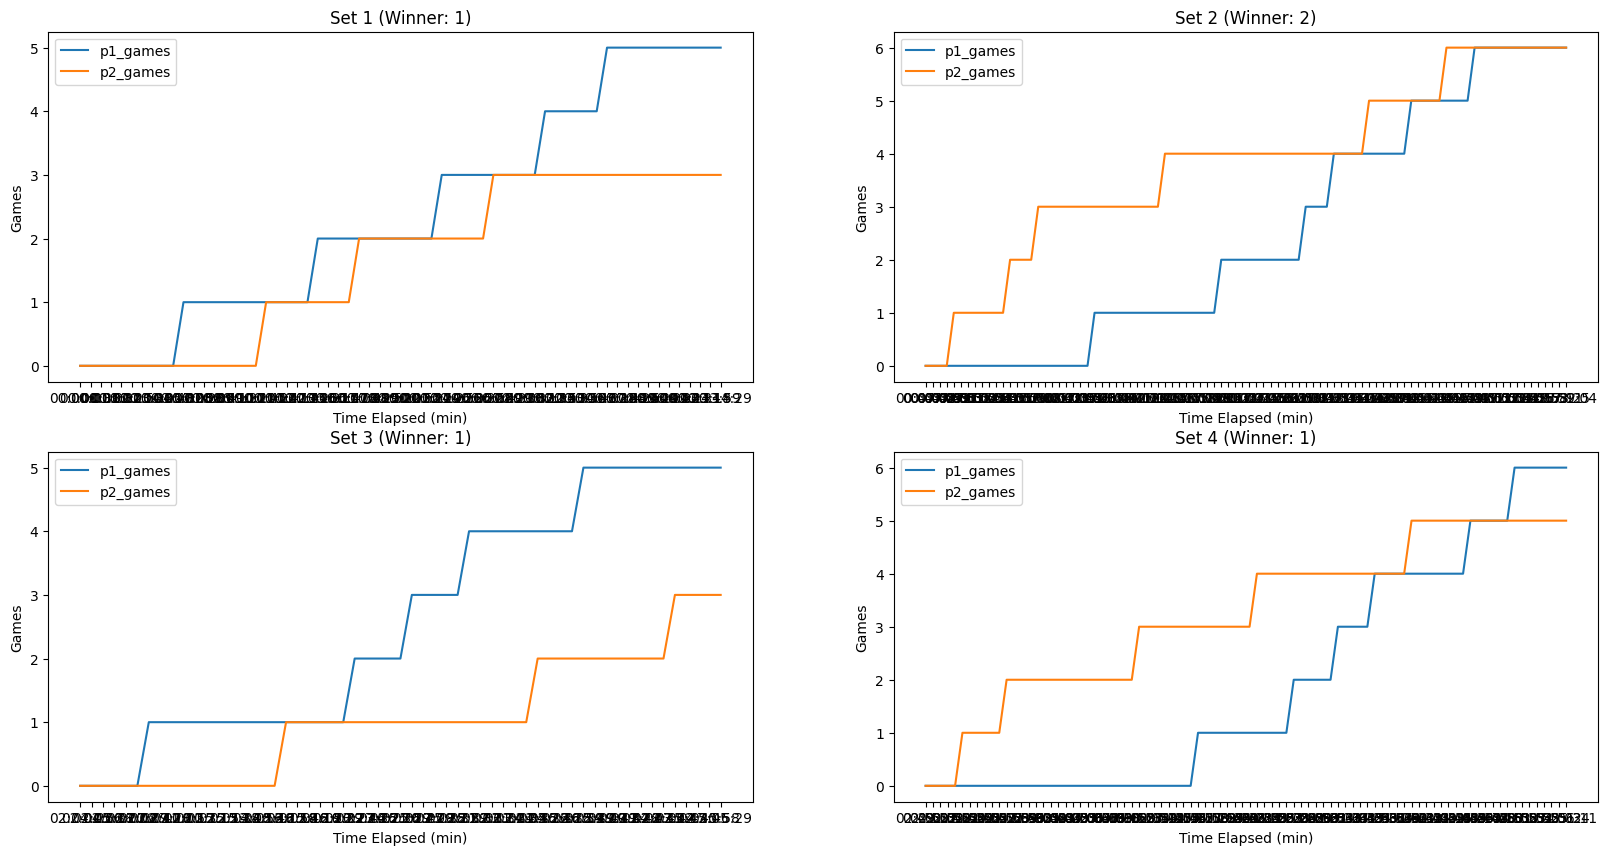

In [40]:
# plot the array of DataFrames
fig, ax = plt.subplots(2,2, figsize=(20, 10))
for i in range(len(match0_sets)):
    # lineplot of 'p1_games' and 'p2_games' vs 'time_elapsed'
    sns.lineplot(x='elapsed_time', y='p1_games', data=match0_sets[i], ax=ax[i//2, i%2], label='p1_games')
    sns.lineplot(x='elapsed_time', y='p2_games', data=match0_sets[i], ax=ax[i//2, i%2], label='p2_games')
    # Set labels and title
    ax[i//2, i%2].set_xlabel('Time Elapsed (min)')
    ax[i//2, i%2].set_ylabel('Games')
    ax[i//2, i%2].set_title(f'Set {i+1} (Winner: {match0_sets[i]["set_victor"].sum()})')


Text(0.5, 1.0, 'Points won by each player winner 1')

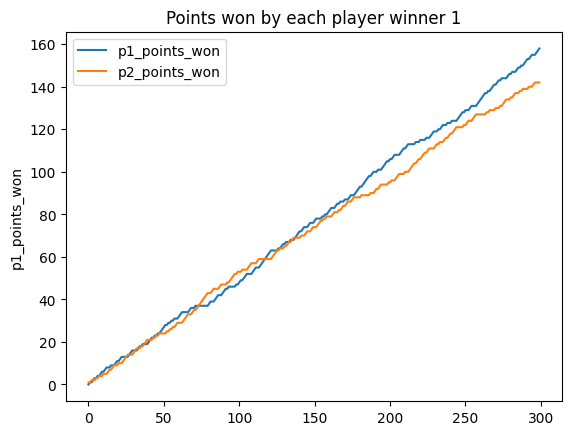

In [46]:
# plot 
sns.lineplot(data=match0["p1_points_won"], label="p1_points_won")
sns.lineplot(data=match0["p2_points_won"], label="p2_points_won")
plt.title(f"Points won by each player winner {match_winner(match0)}")
